In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
lamb = 2
mu = 8
c = 2

In [2]:
def count_wait_times(lamb,mu,c):
    rho = lamb/ (c*mu)
    p = np.zeros(c)
    for i in range(c):
        p[i] = np.power(c*rho,i)/math.factorial(i)
    
    p_0 = 1/ (np.sum(p) + (np.power(c*rho,c)/(math.factorial(c)*(1-rho))))
    N_q = (p_0 * np.power((lamb/mu),c)*rho) /( math.factorial(c)*np.power(1-rho,2))
    return N_q / lamb

In [3]:

val_lamb = np.arange(1.0,8.0, 0.05)
avg_waiting = np.zeros([len(val_lamb),1])
for i in range(len(val_lamb)):
    avg_waiting[i] = count_wait_times(val_lamb[i],mu,c)
    
avg_2 = pd.DataFrame(avg_waiting,columns=["fifo"],index=val_lamb)
avg_2["lambda"] = val_lamb

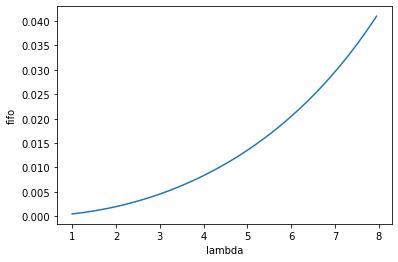

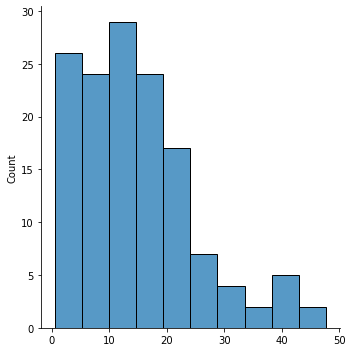

In [4]:
sns.lineplot(data=avg_2,x = "lambda",y="fifo" )
s = np.random.default_rng().gamma(2,scale = mu,size=len(val_lamb))
sns.displot(data =s )